# Objetivo: Scrappear los titulares, y ver el tópico del que habla cada uno

In [ ]:
pip install requests beautifulsoup4

Se va a la url de emol, y se seleccoinan los objetios tipo < a >, que tengan en sus href /noticias/

De ellos no todos contiene texto , se almacenan solo los textos

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = "https://www.emol.com/"
response = requests.get(url)
response.encoding = 'utf-8'

#Converts the raw HTML into a structured format (soup) so i can query it with CSS selectors.
soup = BeautifulSoup(response.text, 'html.parser')

titulares = soup.select('a[href*="/noticias/"]')

df=pd.DataFrame({'indice':[], 'Titulo':[], 'link':[]})
for i, t in enumerate(titulares, 1):
    texto = t.get_text(strip=True) # get text saca los tags del html. y strip quita los espacios previos y posteriores del texto
    if texto:# and len(texto) > 40:  # filtro opcional para evitar links cortos irrelevantes
        link = t['href']
        if link.startswith("/"):
            link = "https://www.emol.com" + link
        fila=pd.DataFrame({'indice':[i], 'Titulo':[texto], 'link':[link]})
        df=pd.concat([df,fila], axis=0)
        print(f"{i}. {texto}")
        print(f"   🔗 {link}")

# no todas las secciones


1. Streaming y entrevistas: La programación de este fin de semana
   🔗 https://www.emol.com/noticias/Nacional/2025/09/08/1177244/programacion-semana-8-septiembre-emoltv.html
4. Chile gana el dobles y se queda con la serie ante Luxemburgo en la Copa Davis para volver al Grupo Mundial
   🔗 https://www.emol.com/noticias/Deportes/2025/09/14/1177852/chile-copadavis-luxemburgo.html
7. La U golea a Colo Colo y conquista la segunda Supercopa de su historia
   🔗 https://www.emol.com/noticias/Deportes/2025/09/14/1177846/universidaddechile-colocolo-supercopa.html
10. La contundente frase de Álvarez y la llamativa reflexión de Ortiz: Qué dijeron los DTs tras la Supercopa
   🔗 https://www.emol.com/noticias/Deportes/2025/09/14/1177851/gustavoalvarez-fernandoortiz-lau-colocolo-supercopa.html
13. Mira los tres goles que le dieron el título a la U en la Supecopa y la expulsión de Vegas en Colo Colo
   🔗 https://www.emol.com/noticias/Deportes/2025/09/14/1177841/goles-colocolo-u-supercopa.html
16. La pot

A continuación se evidencian los 4 primeros elemntos (de la extrccion original), no todos tienen texto, por eso el enumerate salta el 2 y el 3

In [ ]:
titulares[:4]

[<a href="/noticias/Nacional/2025/08/25/1175940/programacion-semana-25-agosto-emoltv.html" id="ucHomePage_cuAlerta_tituloLink">Streaming y entrevistas: La programación de este fin de semana</a>,
 <a href="/noticias/Deportes/2025/08/31/1176571/alexis-sanchez-sevilla-liga.html" id="ucHomePage_cuNoticiaDeporte_linkBanner">
 <img alt="Ir a la noticia" border="0" id="ucHomePage_cuNoticiaDeporte_imgBanner" src="//static.emol.cl/emol50/Fotos/Pandora/2025/08/31/file_20250831181905.jpg" title="Ir a la noticia">
 </img></a>,
 <a href="/noticias/Deportes/2025/08/31/1176571/alexis-sanchez-sevilla-liga.html" id="ucHomePage_cuNoticiaDeporte_linkImgPrin">
 <img alt="Bombazo: Alexis tiene acuerdo para volver a la Liga española" border="0" id="ucHomePage_cuNoticiaDeporte_ImgPrin" src="//static.emol.cl/emol50/Fotos/Pandora/2025/08/31/file_20250831181838.jpg">
 </img></a>,
 <a href="/noticias/Deportes/2025/08/31/1176571/alexis-sanchez-sevilla-liga.html" id="ucHomePage_cuNoticiaDeporte_titular">Bombazo: A

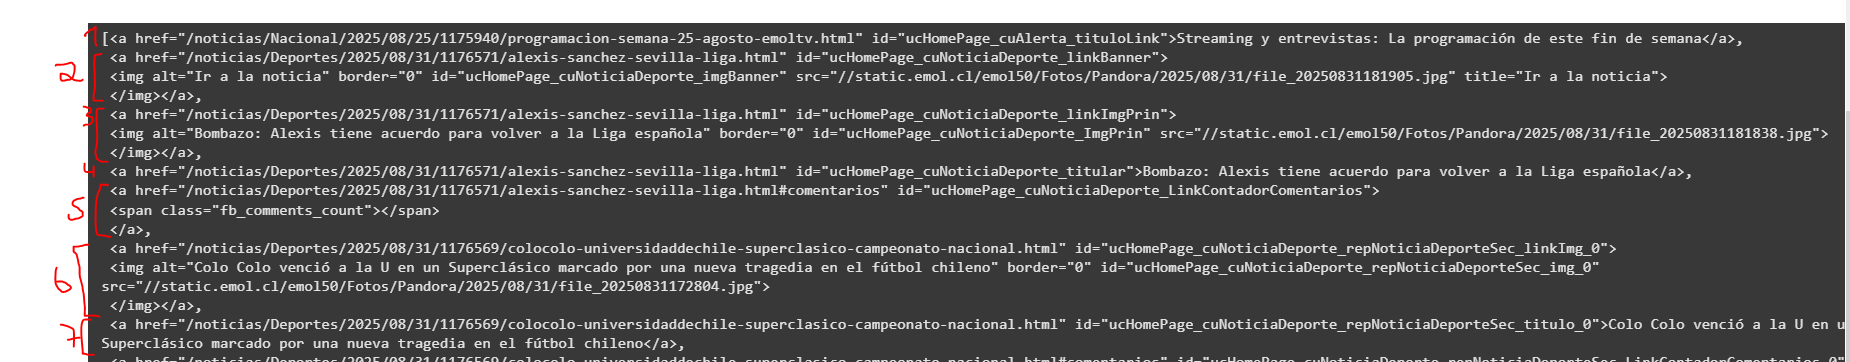

El tópico está dado por la seccion después de /noticias/ en la url

In [ ]:
df.head()

,indice,Titulo,link
0,1.0,Streaming y entrevistas: La programación de es...,https://www.emol.com/noticias/Nacional/2025/08...
0,4.0,¡En vivo! ALCARAZ ES CAMPEÓN DEL US OPEN y nue...,https://www.emol.com/noticias/Deportes/2025/09...
0,7.0,El operativo de seguridad por presencia de Don...,https://www.emol.com/noticias/Deportes/2025/09...
0,10.0,Cobresal complica a Colo Colo y Palestino le d...,https://www.emol.com/noticias/Deportes/2025/09...
0,12.0,La U ya pidió estadio fuera de Santiago para r...,https://www.emol.com/noticias/Deportes/2025/09...


In [ ]:
df.iloc[0, 2]

'https://www.emol.com/noticias/Nacional/2025/08/25/1175940/programacion-semana-25-agosto-emoltv.html'

In [ ]:
df["topic"] = df["link"].str.split("/").str[4]

In [ ]:
df.head()

,indice,Titulo,link,topic
0,1.0,Streaming y entrevistas: La programación de es...,https://www.emol.com/noticias/Nacional/2025/08...,Nacional
0,4.0,Bombazo: Alexis tiene acuerdo para volver a la...,https://www.emol.com/noticias/Deportes/2025/08...,Deportes
0,7.0,Colo Colo venció a la U en un Superclásico mar...,https://www.emol.com/noticias/Deportes/2025/08...,Deportes
0,10.0,Michael Clark revela que la U pidió suspender ...,https://www.emol.com/noticias/Deportes/2025/08...,Deportes
0,13.0,Mira el gol de Colo Colo y la expulsión que de...,https://www.emol.com/noticias/Deportes/2025/08...,Deportes


Qué topicos distintos existen?

In [ ]:
df['topic'].unique()

array(['Nacional', 'Deportes', 'Tendencias', 'Internacional'],
      dtype=object)

In [ ]:
df.shape

(49, 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib
joblib.dump(df, '/content/drive/MyDrive/PROYECTO PERSONAL/df_emol_2.joblib')

['/content/drive/MyDrive/PROYECTO PERSONAL/df_emol_2.joblib']

In [ ]:
import joblib
df_2=joblib.load('/content/drive/MyDrive/PROYECTO PERSONAL/df_emol_1.joblib')

In [ ]:
df_2.shape

(47, 4)

In [ ]:
df_final=pd.concat([df,df_2])

cuantas noticias hay de cada tema:

In [ ]:
df_final.head()

,indice,Titulo,link,topic
0,1.0,Streaming y entrevistas: La programación de es...,https://www.emol.com/noticias/Nacional/2025/09...,Nacional
0,4.0,Chile gana el dobles y se queda con la serie a...,https://www.emol.com/noticias/Deportes/2025/09...,Deportes
0,7.0,La U golea a Colo Colo y conquista la segunda ...,https://www.emol.com/noticias/Deportes/2025/09...,Deportes
0,10.0,La contundente frase de Álvarez y la llamativa...,https://www.emol.com/noticias/Deportes/2025/09...,Deportes
0,13.0,Mira los tres goles que le dieron el título a ...,https://www.emol.com/noticias/Deportes/2025/09...,Deportes


In [ ]:
df_final.topic.value_counts()

,count
topic,
Nacional,52
Deportes,34
Internacional,5
Economia,4
Espectaculos,1


# Ahora: armar un modelo que permita predecir el tópico

Probar:
1) Zero-shot classifier
2) Embeddings + nearest centroid (few-shot friendly)
3) Embeddings + trainning small classifier
4) TF-IDF + Linear model


# 1) zero shot: ocupa modelo preentrenado

clasifica data sin entrenar

In [ ]:
from transformers import pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# labeled data
X = df_final["Titulo"].tolist()
y = df_final["topic"].tolist()
labels = sorted(set(y))  # candidate labels

# Zero-shot model
clf = pipeline("zero-shot-classification",
               model="joeddav/xlm-roberta-large-xnli") #modelo de Hugging Face

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_preds, all_true = [], []

for train_idx, test_idx in skf.split(X, y): # se pdría llegar a ser más estricto para que las catggorías con pocos datos esten siempre en el set de entrenamineto
    X_test = [X[i] for i in test_idx]
    y_test = [y[i] for i in test_idx]

    preds = []
    for text in X_test:
        result = clf(text, candidate_labels=labels, multi_label=False) #multi_label=False asume que el texto pertenece a una sola cateoría, así las probabilidades de cada alternativa suman 1
        preds.append(result["labels"][0])  # top predicted label

    all_preds.extend(preds)
    all_true.extend(y_test)

print(classification_report(all_true, all_preds, digits=3))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


               precision    recall  f1-score   support

     Deportes      0.688     0.324     0.440        34
     Economia      0.750     0.750     0.750         4
 Espectaculos      0.018     1.000     0.034         1
Internacional      0.333     0.600     0.429         5
     Nacional      0.700     0.135     0.226        52

     accuracy                          0.260        96
    macro avg      0.498     0.562     0.376        96
 weighted avg      0.671     0.260     0.332        96



f1 score mide media armonica entre precision y recall

## Para medir la performance en este caso conviene medir f1-score weighted avg (promedio de f1 score de las distintas clases, ponderada por su frecuencia (su support) que es de 0.332


# 2) Embeddings + nearest centroid (few-shot friendly)

In [ ]:
# Cuales son los distintos topicos existentes
for k, grp in df_final.groupby('topic'):
  print(k)
  # grp es la fila en cuestion

Deportes
Economia
Espectaculos
Internacional
Nacional


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import torch
#SentenceTransformer: loads pretrained models that turn text into numerical embeddings (vectors).
#util.cos_sim: computes cosine similarity between embeddings.

model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
#It turns a sentence like “Colo Colo gana el superclásico” into a 384-dimensional vector that captures its meaning.


# hago cross validation, y en cada entrenamiento configuro centroides y clasifico
# labeled data
X = df_final["Titulo"].tolist()
y = df_final["topic"].tolist()

# IMPORTANT: n_splits must be <= min(#samples in any class), que es algo que se omite en este ejercicio
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_preds, all_true = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_test = [X[i] for i in test_idx]
    X_train=[X[i] for i in train_idx]
    y_test = [y[i] for i in test_idx]
    y_train=[y[i] for i in train_idx]


        # ---- Build centroids from TRAIN fold only ----
    train_df = pd.DataFrame({"title": X_train, "topic": y_train})
    centroids = {}
    for k, grp in train_df.groupby("topic"):
        emb = model.encode(
            grp["title"].tolist(),
            convert_to_tensor=True,
            normalize_embeddings=True
        )
        centroids[k] = emb.mean(dim=0)


    labels_in_fold = list(centroids.keys())
    centroid_mat = torch.stack([centroids[k] for k in labels_in_fold])  # va a buscar el embedding de cada centroide, y los une a traves del metodo stack, para que sean una matriz [C, D]

        # ---- Predict on TEST fold ----
    E_test = model.encode(X_test, convert_to_tensor=True, normalize_embeddings=True)  # [N, D] E_test es de dimension cantidad samples (N) x dimension del embedding (D)
    S = util.cos_sim(E_test, centroid_mat)  # similiariad coseno entre cada test sample y cada centroide de cada clase. Para cada sample hay una fila, con la similiaridad coseno con cada clase
    #cos_sim mide el ángulo entre 2 vecores, independinete de su magnitud. 1 indica que son iguales, 0 que son ortogonales (sin relacion)
    pred_idx = torch.argmax(S, dim=1).cpu().numpy()  #torch.argmax(S, dim=1) da el indice de la clase que más se parece a ese ejemplo (al final es una serie con un valor por fila original)
    #cpu() es por temas de torch, cuando ocupas gpu
    y_pred = [labels_in_fold[i] for i in pred_idx]


    all_preds.extend(y_pred)
    all_true.extend(y_test)

print(classification_report(all_true, all_preds, digits=3))

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


               precision    recall  f1-score   support

     Deportes      0.865     0.941     0.901        34
     Economia      0.200     0.500     0.286         4
 Espectaculos      0.000     0.000     0.000         1
Internacional      1.000     0.200     0.333         5
     Nacional      0.894     0.808     0.848        52

     accuracy                          0.802        96
    macro avg      0.592     0.490     0.474        96
 weighted avg      0.851     0.802     0.808        96



## en este caso el f1-score weighed avg da 0.808

# 3) Embeddings + trainning small classifier

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#SentenceTransformer: loads pretrained models that turn text into numerical embeddings (vectors).
#util.cos_sim: computes cosine similarity between embeddings.

model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
#It turns a sentence like “Colo Colo gana el superclásico” into a 384-dimensional vector that captures its meaning.


# hago cross validation, y en cada entrenamiento configuro centroides y clasifico
# labeled data
X = df_final["Titulo"].tolist()
y = df_final["topic"].tolist()
le = LabelEncoder()
y = le.fit_transform(y)


X = model.encode(X, convert_to_numpy=True, normalize_embeddings=True)

# IMPORTANT: n_splits must be <= min(#samples in any class), que es algo que se omite en este ejercicio
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_preds, all_true = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


    # Train logistic regression on embeddings
    clf = LogisticRegression(
        max_iter=2000,
        class_weight="balanced", #hace que le de más peso a las clases menos frecunentes para que ta,bién las prediga bien, o sino predeciría mejor solo en la clase más frecuente
        multi_class="auto",
        solver="lbfgs" # de qué forma de estiman los bteha de la regresion, este es un quasi-Newton optimization algorithm.. Soporta multinomial regression
    )
    clf.fit(X_train, y_train)

    # Predict on test fold
    y_pred = clf.predict(X_test)

    all_true.extend(y_test)
    all_preds.extend(y_pred)

# ----------------------------------
# Overall evaluation
# ----------------------------------
print("\n=== Overall (all folds) ===")
print(classification_report(all_true, all_preds, target_names=le.classes_, digits=3))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



=== Overall (all folds) ===
               precision    recall  f1-score   support

     Deportes      0.919     1.000     0.958        34
     Economia      0.500     0.500     0.500         4
 Espectaculos      0.000     0.000     0.000         1
Internacional      1.000     0.400     0.571         5
     Nacional      0.904     0.904     0.904        52

     accuracy                          0.885        96
    macro avg      0.665     0.561     0.587        96
 weighted avg      0.888     0.885     0.879        96



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# f1 score weighted avg 0.879

# 4) TF-IDF + Linear model

tf-idf es una forma de hacer un embedding del texto

(term fecuency - inverse document frequency)

junta vario textos y los transforma en una matriz de numeros

Cada columna una palabra del vocabulario

Cada fila un documento

Cada celda tiene el peso de esa palabra en ese documento (alto peso si la palabra es frecuente en el documento pero rara en el total de textos)

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


# labeled data
X = df_final["Titulo"].astype(str)
y = df_final["topic"].astype(str)
le = LabelEncoder()
y = le.fit_transform(y)
classes = le.classes_


# Build once (same params across folds)
pipe = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.9,
        strip_accents='unicode',   # good for Spanish accents
        lowercase=True
    )),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced", #helps with imbalanced topics.
        solver="lbfgs",
        multi_class="auto",
        n_jobs=None
    ))
])



# IMPORTANT: n_splits must be <= min(#samples in any class), que es algo que se omite en este ejercicio
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_preds, all_true = [], []
fold_reports = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    all_true.extend(y_test)
    all_preds.extend(y_pred)

# ----------------------------------
# Overall evaluation
# ----------------------------------
print("\n=== Overall (all folds) ===")
print(classification_report(all_true, all_preds, target_names=le.classes_, digits=3))


=== Overall (all folds) ===
               precision    recall  f1-score   support

     Deportes      0.816     0.912     0.861        34
     Economia      0.000     0.000     0.000         4
 Espectaculos      0.000     0.000     0.000         1
Internacional      0.500     0.400     0.444         5
     Nacional      0.843     0.827     0.835        52

     accuracy                          0.792        96
    macro avg      0.432     0.428     0.428        96
 weighted avg      0.772     0.792     0.780        96



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default 

# f1 score weighted avg 0.78

# el mejor método de prediccion del tópico del titular fue Embeddings + trainning small classifier